Problem Statement: Automated Classification of Date Fruit Varieties
Background
Date fruits, grown globally, have various genetic varieties distinguished by their external appearance, including features like color, length, diameter, and shape. Traditionally, identifying these varieties requires expert knowledge, which is both time-consuming and labor-intensive. Automating this process using machine learning can significantly enhance efficiency and accuracy.

Objective
The aim of this study is to develop an automated system for classifying different varieties of date fruits using image analysis and machine learning techniques. Specifically, the varieties to be classified include Barhee, Deglet Nour, Sukkary, Rotab Mozafati, Ruthana, Safawi, and Sagai.

Dataset Description
The dataset consists of 898 images of seven different date fruit varieties, captured using a computer vision system (CVS). From these images, 34 features were extracted, encompassing morphological characteristics, shape, and color.

Impact
Developing an automated classification system for date fruit varieties will streamline the identification process, reduce the need for expert intervention, and ensure consistent and accurate classification. This can significantly benefit agricultural practices, quality control, and market segmentation for date fruits.

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
import os
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, mean_squared_error, r2_score

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
file_path = '/content/drive/My Drive/Fruits_analysis/Date_Fruit_Datasets.xlsx'

In [49]:
# Load the dataset
data = pd.read_excel(file_path)

In [50]:
data.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [52]:
# Separate features and target
X = data.drop(['Class'], axis=1)
Y = data['Class']

In [53]:
Y.head()

0    BERHI
1    BERHI
2    BERHI
3    BERHI
4    BERHI
Name: Class, dtype: object

In [54]:
Y.unique()

array(['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'],
      dtype=object)

In [55]:
le = LabelEncoder()
y = le.fit_transform(Y)

In [56]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [57]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state = 42 , test_size = 0.2)

In [58]:
X_train

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
880,364338,2385.5110,849.6287,548.4377,0.7638,681.0944,0.9874,368969,0.7596,1.5492,...,0.3835,2.5413,2.7010,4.7956,-45702238208,-31309285376,-31791349760,54.5422,46.1706,47.5687
740,343379,2360.4670,919.1130,479.2314,0.8533,661.2138,0.9657,355591,0.6926,1.9179,...,0.8084,13.2536,10.8915,5.0327,-6173152768,-10177111040,-13946608640,20.5354,27.7553,33.2095
231,80044,1059.0460,378.1419,270.6614,0.6983,319.2416,0.9883,80990,0.7521,1.3971,...,-0.1599,2.2247,2.4509,2.2165,-9834114048,-9082079232,-8377428480,54.3915,53.0591,50.5000
388,394009,2279.7581,770.8477,654.0494,0.5292,708.2852,0.9945,396190,0.7632,1.1786,...,1.6654,5.7796,9.1424,7.8056,-18411845632,-23242752000,-23591233536,34.5177,38.9835,38.4695
118,242874,1843.9160,647.9982,479.8817,0.6720,556.0906,0.9906,245181,0.7818,1.3503,...,-0.3694,2.4534,2.2759,2.5079,-46650236928,-40748339200,-32199612416,66.5225,62.6833,56.9092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,169573,1548.9830,594.8965,364.4516,0.7904,464.6580,0.9932,170738,0.8245,1.6323,...,-0.6257,2.4879,2.1186,2.4125,-35847098368,-33293408256,-27052677120,69.5829,67.4267,61.7498
270,102142,1223.5020,441.7251,296.5040,0.7412,360.6262,0.9863,103559,0.7847,1.4898,...,-0.5385,3.7325,3.9749,3.0696,-20307597312,-20240594944,-18247018496,68.7153,69.4312,65.9034
860,212397,1773.1410,649.3710,418.6798,0.7644,520.0310,0.9773,217331,0.7605,1.5510,...,0.1680,2.8597,2.8887,3.0498,-21660262400,-16450807808,-15513940992,50.1400,43.9826,43.0455
435,441826,2486.4771,942.0581,603.1290,0.7682,750.0336,0.9948,444138,0.8075,1.5620,...,1.7484,7.9695,9.3755,7.3022,-36332118016,-32863416320,-37779701760,43.0456,41.0627,43.2121


In [59]:
y_train


array([6, 5, 2, 3, 1, 3, 2, 0, 0, 5, 4, 5, 2, 1, 2, 4, 4, 4, 5, 4, 6, 6,
       4, 2, 5, 5, 5, 4, 4, 2, 4, 6, 5, 6, 2, 0, 5, 1, 4, 3, 1, 2, 6, 2,
       2, 3, 2, 5, 2, 4, 0, 2, 6, 4, 2, 1, 4, 6, 5, 5, 5, 5, 3, 4, 3, 4,
       3, 6, 5, 2, 4, 1, 1, 3, 0, 3, 3, 4, 6, 2, 1, 4, 4, 5, 4, 5, 6, 2,
       3, 5, 2, 2, 4, 6, 2, 6, 1, 6, 2, 5, 5, 1, 1, 3, 6, 1, 2, 0, 4, 2,
       2, 4, 4, 3, 1, 2, 0, 4, 4, 1, 5, 3, 5, 1, 2, 2, 5, 3, 1, 4, 4, 2,
       0, 4, 1, 3, 0, 2, 4, 6, 0, 2, 3, 3, 0, 3, 6, 5, 2, 4, 5, 3, 5, 0,
       5, 4, 1, 0, 2, 2, 2, 5, 0, 2, 4, 4, 2, 4, 5, 5, 3, 4, 4, 2, 4, 5,
       2, 2, 4, 5, 1, 1, 4, 5, 1, 1, 4, 1, 4, 1, 2, 6, 6, 6, 4, 5, 1, 0,
       3, 0, 0, 2, 2, 5, 4, 5, 4, 2, 4, 5, 4, 2, 5, 5, 5, 3, 2, 4, 2, 5,
       0, 0, 3, 2, 4, 6, 5, 3, 2, 6, 6, 5, 2, 4, 0, 2, 0, 2, 2, 4, 5, 6,
       4, 2, 6, 4, 2, 2, 1, 4, 4, 6, 2, 2, 5, 3, 4, 1, 1, 5, 4, 2, 1, 6,
       2, 2, 5, 4, 2, 1, 5, 1, 1, 5, 2, 2, 0, 6, 4, 5, 3, 4, 1, 2, 5, 1,
       2, 5, 5, 4, 4, 2, 2, 5, 1, 5, 6, 6, 5, 3, 2,

In [60]:
y_test

array([2, 5, 2, 6, 0, 2, 3, 2, 2, 1, 1, 2, 2, 2, 4, 4, 6, 5, 6, 1, 5, 4,
       2, 4, 5, 2, 0, 6, 0, 5, 6, 1, 2, 4, 2, 5, 0, 2, 2, 5, 1, 4, 5, 5,
       2, 1, 1, 2, 2, 5, 4, 3, 2, 6, 2, 4, 1, 2, 2, 0, 3, 6, 2, 2, 2, 6,
       1, 2, 4, 4, 2, 2, 4, 6, 3, 4, 2, 4, 5, 4, 2, 1, 4, 4, 2, 4, 2, 5,
       3, 2, 2, 5, 5, 3, 1, 2, 2, 2, 2, 4, 4, 3, 2, 5, 5, 4, 3, 4, 4, 2,
       5, 2, 4, 4, 4, 6, 1, 5, 5, 4, 4, 2, 5, 1, 5, 5, 6, 1, 4, 4, 2, 1,
       3, 4, 4, 2, 4, 2, 5, 0, 5, 5, 5, 6, 6, 5, 2, 0, 0, 5, 6, 4, 6, 1,
       1, 5, 6, 1, 2, 3, 5, 2, 6, 5, 0, 0, 2, 4, 2, 4, 1, 6, 5, 6, 6, 5,
       0, 1, 0, 2])

In [61]:

#Standardizing features by removing the mean and scaling to unit variance.
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.fit_transform(X_test)

In [62]:
# Checking if there is any na value in dataset
data.isna().sum().to_frame()

,0
AREA,0
PERIMETER,0
MAJOR_AXIS,0
MINOR_AXIS,0
ECCENTRICITY,0
EQDIASQ,0
SOLIDITY,0
CONVEX_AREA,0
EXTENT,0
ASPECT_RATIO,0


In [63]:
# Counting the number of instances of each class
data['Class'].value_counts()

Class
DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: count, dtype: int64

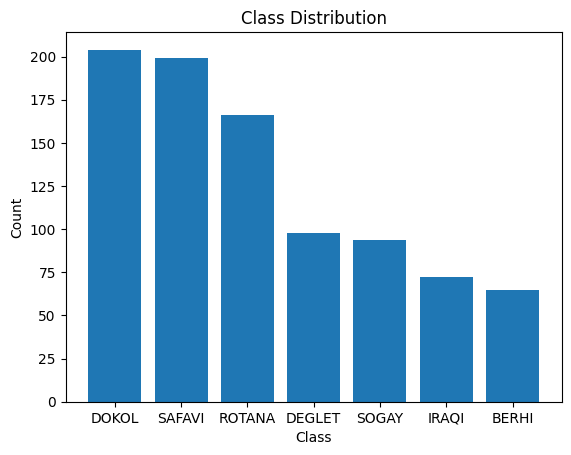

In [64]:
#Plotting a bar chart to show the classes
plt.bar(data['Class'].value_counts().index.to_list(), data['Class'].value_counts().values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [65]:
X.shape, y.shape

((898, 34), (898,))

In [66]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
# Encode categorical data for both features and target variable
data['Class'] = data['Class'].map({'BERHI': 0, 'DEGLET': 1,'DOKOL': 2, 'IRAQI': 3,'ROTANA': 4, 'SAFAVI': 5,'SOGAY': 6})
Y = data['Class'] # Assuming 'Class' is your target variable

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 2: Build the initial MLPRegressor model
mlp = MLPRegressor(random_state=42, max_iter=1000)
mlp.fit(X_train, y_train)

MLPRegressor(max_iter=1000, random_state=42)

In [67]:
# Make predictions
Y_train_pred = mlp.predict(X_train)
Y_test_pred = mlp.predict(X_test)

In [68]:
# Evaluate the model
mse_train = mean_squared_error(Y_train, Y_train_pred)
mse_test = mean_squared_error(Y_test, Y_test_pred)


print(f"Initial MLP Regressor Train Mean Squared Error: {mse_train}")
print(f"Initial MLP Regressor Test Mean Squared Error: {mse_test}")

Initial MLP Regressor Train Mean Squared Error: 0.14748531703396572
Initial MLP Regressor Test Mean Squared Error: 0.8721664768987897
